# Apparatus 

Below is a simplified schematic of our apparatus, as viewed from above:

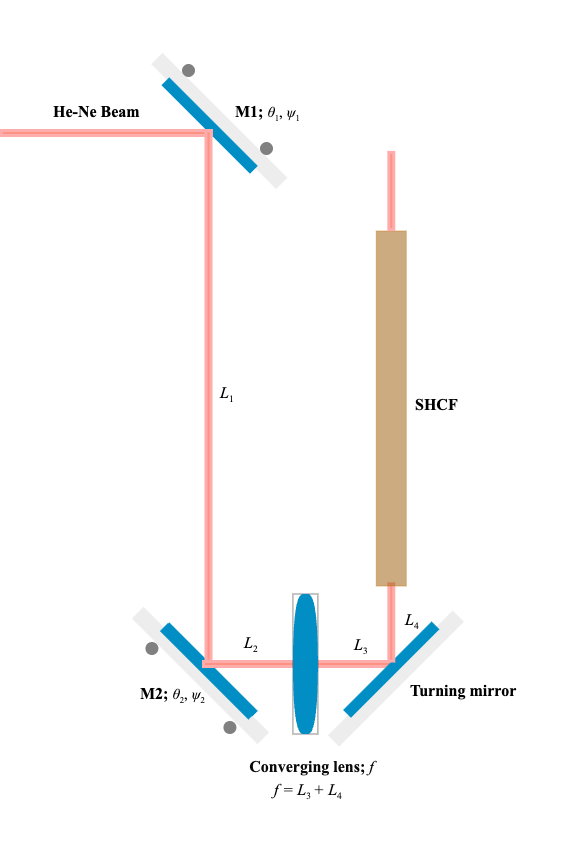

# Question

The beam path reflected by the two mirrors depends on their relative orientations. What we are interested in is calculating the position and angle of the beam at the entrance to the fiber as a function of $\theta_1$, $\psi_1$, $\theta_2$, and $\psi_2$; the $\theta$'s denote pitches, the $\psi$'s denote yaws, and the subscripts identify the mirror.

(⚠️ I guess what we are doing in what follows is shooting a single ray. In reality, of course, we'll be shooting the many beams that make up the Gaussian profile of our beam. But the point here, I'd say, is to just get something working for a single ray, and then we can worry about modeling the profile for multiple ray tracing.)

# Conventions 

We will follow the prescrption given in [this](https://www.thorlabs.com/images/TabImages/3D_Reflected_Ray_Vector_Mirror_Matrix_Algebra_Rev1.pdf) ThorLabs document. We adopt the following defintions for pitch and yaw:

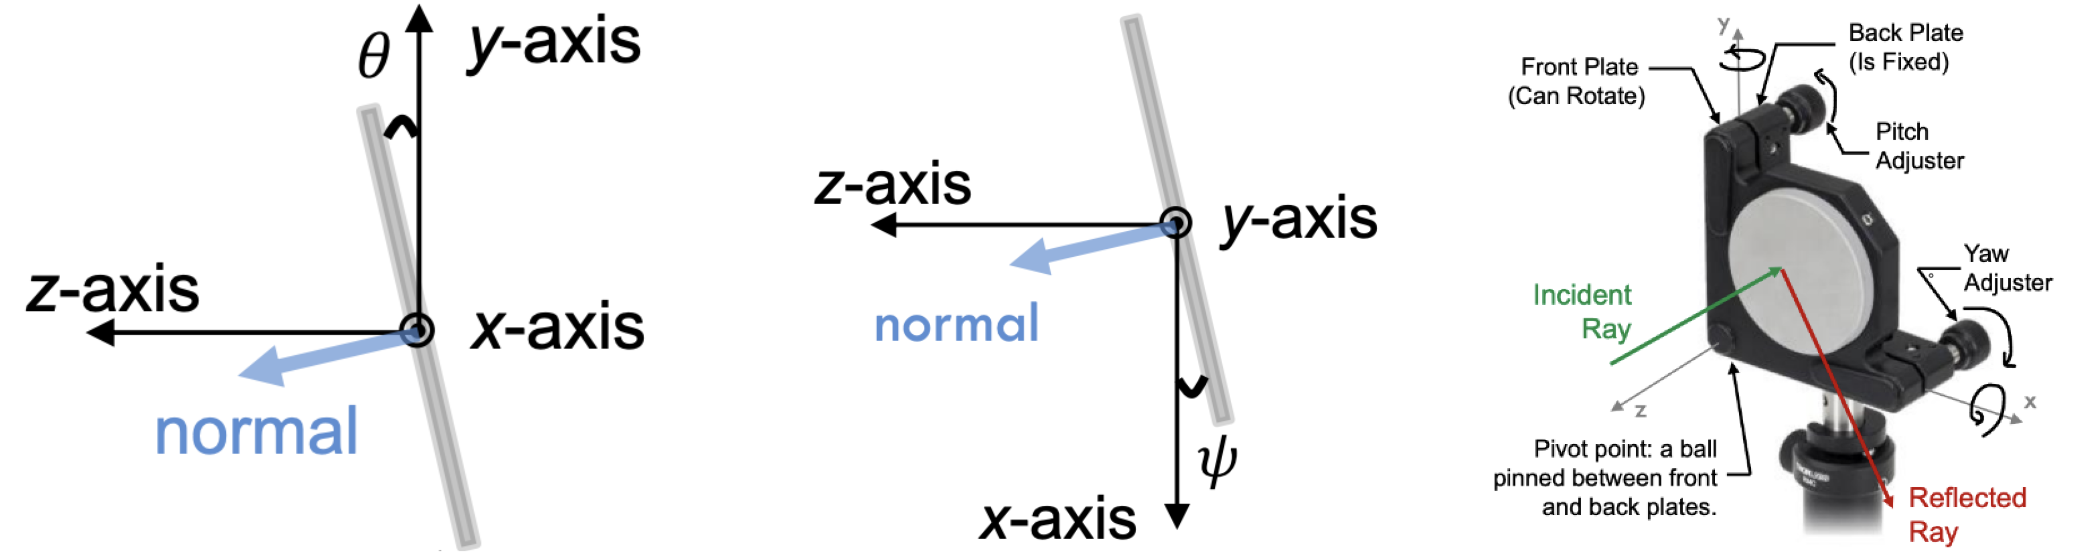

- Positive pitch ($\theta$) around $x$-axis is counterclockwise
(CCW), when looking towards the origin, down the $x$-axis.
-  Positive yaw ($\psi$) around $y$-axis is CCW, when looking
towards the origin, down the $y$-axis.
-  The center of the reflective surface always coincides with
the origin, regardless of its orientation.

# Procedure

The procedure for calculating the direction of the reflected ray relative to the incident ray is given as follows:

1) Transform the unit vector of the incident
ray from global $\boldsymbol{i}$ to local $\boldsymbol{i'}$ coordinates using the inverse rotation matrix, $\boldsymbol{R}_\mathrm{Total}^{-1}$: 

$$\boldsymbol{i'} = \boldsymbol{R}_\mathrm{Total}^{-1}(\theta, \psi)\boldsymbol{i}$$

2) Reflect the ray across the local normal $\boldsymbol{n}$ to obtain the reflected ray $\boldsymbol{r'}$ in local coordinates:

$$\boldsymbol{r'} = \boldsymbol{i'} - 2(\boldsymbol{i'} \cdot \boldsymbol{n})\boldsymbol{n}$$


3) Convert the reflected ray back into global coordinates $\boldsymbol{r}$ using the rotation matrix $\boldsymbol{R}_\mathrm{Total}$:

$$\boldsymbol{r} = \boldsymbol{R}_\mathrm{Total}(\theta, \psi)\boldsymbol{r'}$$

(We motivate these steps in the "Appendix.")


# Calculation

We impose a global coordinate system on our apparatus, taking the mirror in the third subfigure of the Conventions section to correspond to M1. Furthermore, we temporarily "unrotate" M1 and M2, enabling easy identifications of the surface normals:

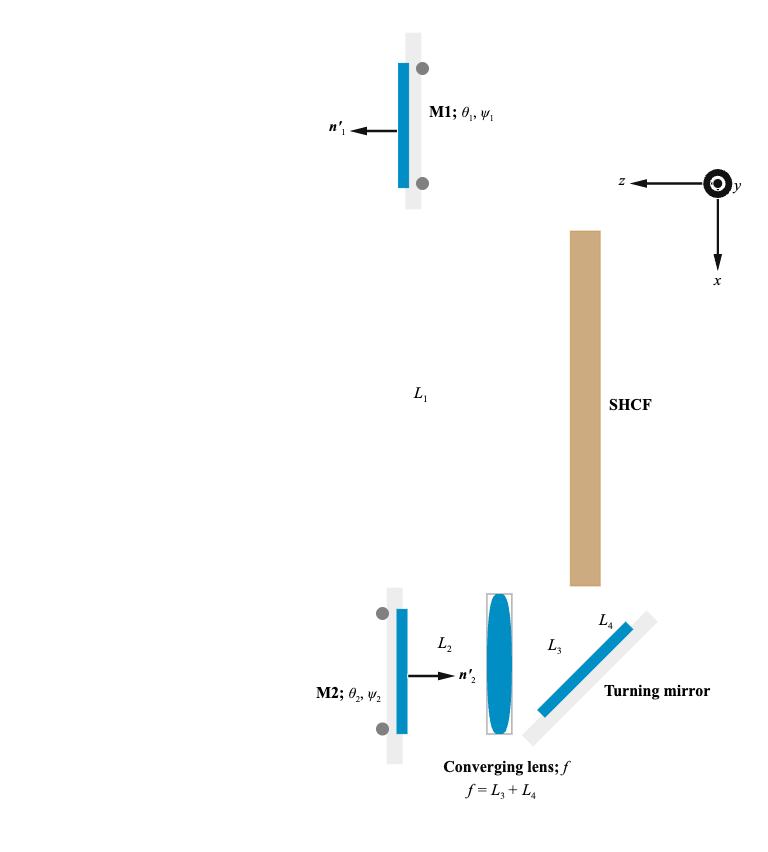

Let us consider the case where first yaw then pitch is adjusted for M1 and first yaw then pitch is adjusted for M2. The reason that we need to specify an ordering as such is that 3-dimensional rotations do not in general commute; phrased another way, rotation is formally equivalent to multiplication by a rotation matrix---and matrix multplication, which would correspond to rotations done in succession, is not a commutative operation. This means that we are considering here one of four possible orderings, but the mathematics is much the same in all cases.

We begin by considering the situation at M1:

- The unit vector of the incident ray in global coordinates is $\boldsymbol{i} = \langle 0, 0, -1 \rangle$.
- The rotation matrix for yaw, then pitch is 
$$
{\bf R_{xy}(\theta, \psi)} = \left ( \begin{array}{ccc}
                     \cos \psi  &  0  &  \sin \psi \\
                    \sin\theta\sin\psi  &  \cos\theta  &  -\sin\theta\cos\psi \\
                     -\cos\theta\sin\psi &  \sin\theta  &  \cos\theta\cos\psi \end{array} \right )
$$

  with inverse (equal to its transpose)

$$
{\bf R_{xy}^{-1}(\theta, \psi)} = \left ( \begin{array}{ccc}
                     \cos \psi  &  \sin\theta\sin\psi  &  -\cos\theta\sin\psi \\
                    0  &  \cos\theta  &  \sin\theta \\
                     \sin\psi &  -\sin\theta\cos\psi  &  \cos\theta\cos\psi \end{array} \right )$$
- The local normal $\boldsymbol{n}$ is $\langle 0, 0, 1 \rangle$.

Running the procedure detailed above, we obtain $\boldsymbol{r}_1 =$

In [1]:
from sympy import *
var('θ_1 θ_2 Ψ_1 Ψ_2')

i_global_1 = Matrix([0, 0, -1])
R_xy_1 = Matrix([[cos(Ψ_1), 0, sin(Ψ_1)], [sin(θ_1)*sin(Ψ_1), cos(θ_1), -sin(θ_1)*cos(Ψ_1)], [-cos(θ_1)*sin(Ψ_1), sin(θ_1), cos(θ_1)*cos(Ψ_1)]])
R_xy_1_inverse = Matrix([[cos(Ψ_1), sin(θ_1)*sin(Ψ_1), -cos(θ_1)*sin(Ψ_1)], [0, cos(θ_1), sin(θ_1)], [sin(Ψ_1), -sin(θ_1)*cos(Ψ_1), cos(θ_1)*cos(Ψ_1)]])
n_local_1 = Matrix([0, 0, 1])


i_local_1 = R_xy_1_inverse.multiply(i_global_1) #1

r_local_1 = i_local_1 - 2*(i_local_1.dot(n_local_1))*n_local_1 #2

r_global_1 = R_xy_1.multiply(r_local_1) #3

r_global_1

Matrix([
[                                                     2*sin(Ψ_1)*cos(Ψ_1)*cos(θ_1)],
[sin(Ψ_1)**2*sin(θ_1)*cos(θ_1) - sin(θ_1)*cos(Ψ_1)**2*cos(θ_1) - sin(θ_1)*cos(θ_1)],
[                 -sin(Ψ_1)**2*cos(θ_1)**2 - sin(θ_1)**2 + cos(Ψ_1)**2*cos(θ_1)**2]])

To reiterate, this is the unit vector of the ray reflected from M1 in global coordinates. Let's do a sanity check: suppose that the yaw is brought to $\psi_1 = 45^{\circ}$, and the pitch is left at $\theta = 0$, so we have a situation as diagrammed in the relevant part of the figure in the Apparatus section. Then we would expect the output unit vector to be straight down, i.e. $\langle 1,0,0 \rangle$ in our coordinate system:

In [2]:
r_global_1.evalf(subs={θ_1: 0, Ψ_1: pi/4})

Matrix([
[    1.0],
[      0],
[0.e-125]])

✅

It will be useful later to use the unit vector of the reflected ray calculated above to calculate arbitrary point's on the ray's path. We now show how to perform such a calculation. #TODO

Now, let's consider the situation at M2, assuming that the light reflecting from M1 makes it to M2.

(⚠️ This is not a trivial assumption. Right now, I'm not giving the mirrors any extent; I'm just treating them as "points" where reflection happens, for which a surface normal is somehow defined. However, it still makes sense to speak of what happens *if* the light from M1 reaches M2.)

- **The unit vector of the incident ray in global coordinates is the unit vector of the "old" reflected ray, $\boldsymbol{r}_1$**.
- The appropriate rotation matrix and its inverse are as before.
- The local normal $\boldsymbol{n}$ is $\langle 0, 0, -1 \rangle$.

Running the procedure, we obtain $\boldsymbol{r}_2 =$

In [3]:
i_global_2 = r_global_1 
R_xy_2 = R_xy_1
R_xy_2_inverse = R_xy_1_inverse
n_local_2 = Matrix([0, 0, 1])

i_local_2 = R_xy_2_inverse.multiply(i_global_2) #1

r_local_2 = i_local_2 - 2*(i_local_2.dot(n_local_2))*n_local_2 #2

r_global_2 = R_xy_2.multiply(r_local_2) #3

r_global_2

Matrix([
[                                                                                                                                                                                                          (-(-sin(Ψ_1)**2*cos(θ_1)**2 - sin(θ_1)**2 + cos(Ψ_1)**2*cos(θ_1)**2)*sin(Ψ_1)*cos(θ_1) + (sin(Ψ_1)**2*sin(θ_1)*cos(θ_1) - sin(θ_1)*cos(Ψ_1)**2*cos(θ_1) - sin(θ_1)*cos(θ_1))*sin(Ψ_1)*sin(θ_1) + 2*sin(Ψ_1)*cos(Ψ_1)**2*cos(θ_1))*cos(Ψ_1) + (-(-sin(Ψ_1)**2*cos(θ_1)**2 - sin(θ_1)**2 + cos(Ψ_1)**2*cos(θ_1)**2)*cos(Ψ_1)*cos(θ_1) + (sin(Ψ_1)**2*sin(θ_1)*cos(θ_1) - sin(θ_1)*cos(Ψ_1)**2*cos(θ_1) - sin(θ_1)*cos(θ_1))*sin(θ_1)*cos(Ψ_1) - 2*sin(Ψ_1)**2*cos(Ψ_1)*cos(θ_1))*sin(Ψ_1)],
[((-sin(Ψ_1)**2*cos(θ_1)**2 - sin(θ_1)**2 + cos(Ψ_1)**2*cos(θ_1)**2)*sin(θ_1) + (sin(Ψ_1)**2*sin(θ_1)*cos(θ_1) - sin(θ_1)*cos(Ψ_1)**2*cos(θ_1) - sin(θ_1)*cos(θ_1))*cos(θ_1))*cos(θ_1) + (-(-sin(Ψ_1)**2*cos(θ_1)**2 - sin(θ_1)**2 + cos(Ψ_1)**2*cos(θ_1)**2)*sin(Ψ_1)*cos(θ_1) + (sin(Ψ_1)**2*sin(θ_1)*cos(θ_1) - sin(θ_1

Well, that's not pretty, but it need not be.  Let's do a sanity check: suppose that the first yaw is brought to $\psi_1 = 45^{\circ}$, and the first pitch is left at $\theta = 0$; and that the second yaw is brought to $\psi_2 = 45^{\circ}$, and the pitch is left at $\theta_2 = 0$. Then we have the situation as diagrammed in the relevant part of the figure in the Apparatus section, and we we would expect the output unit vector to be to the right, i.e. $\langle 0, 0, -1 \rangle$ in our coordinate system:

In [4]:
r_global_2.evalf(subs={θ_1: 0, θ_2: 0, Ψ_1: pi/4, Ψ_2: pi/4})

Matrix([
[0.e-125],
[      0],
[   -1.0]])

✅